# Essential matrix results

In [73]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from importlib import reload
import EightPoint
import graph_utils
reload(graph_utils)
reload(EightPoint)
from EightPoint import EightPoint
from processSequence import Sequence
from graph_utils import plot_epipolar_lines

### Ground Truth F

In [74]:
R = np.eye(3)
T = [-0.07537688314914703, 0, 0]
Tx = np.cross(np.eye(3), T)

E = Tx @ R

print(f"E: {E}")

K = np.array([[2666.666666666, 0, 960],
            [0, 2666.666666666, 540],
            [0, 0, 1]]) 



F_actual=np.linalg.inv(K.T)@E@np.linalg.inv(K)
print(F_actual)
print(F_actual/  np.linalg.norm(F_actual))

E: [[ 0.          0.          0.        ]
 [ 0.          0.          0.07537688]
 [ 0.         -0.07537688  0.        ]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.82663312e-05]
 [ 0.00000000e+00 -2.82663312e-05  0.00000000e+00]]
[[ 0.          0.          0.        ]
 [ 0.          0.          0.70710678]
 [ 0.         -0.70710678  0.        ]]


In [75]:

EPA = EightPoint()
# Load data
#sequence = Sequence('./Reference_Render_cubes/Reference_Render_Translation')
sequence = Sequence('./Reference_Render_cubes/Reference_Render_Rotation_and_Translations')

K = np.array([[2666.666666666/1000, 0, 960],
            [0, 2666.666666666/1000, 540],
            [0, 0, 1]]) 

im1 = sequence.images[0]
im2 = sequence.images[1]
pts1, pts2 = EPA.getMatchingPointsOpenCV(im1, im2)

F, _ = EPA.getFundamentalRANSAC(pts1, pts1)

F_cv, _ = cv2.findFundamentalMat(pts1, pts2, cv2.RANSAC, 1)





['./Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0001.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0002.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0003.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0004.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0005.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0006.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0007.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0008.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0009.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0010.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0011.png', './Reference_Render_cubes/Reference_Render_Rotation_a

c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\EightPoint.py:99: RuntimeWarning: divide by zero encountered in divide
  F = F/F[2,2]
c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\EightPoint.py:99: RuntimeWarning: invalid value encountered in divide
  F = F/F[2,2]
c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\EightPoint.py:126: RuntimeWarning: invalid value encountered in matmul
  error = np.abs(np.sum(pts2_hom * (F @ pts1_hom.T).T, axis=1))
c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\EightPoint.py:132: RuntimeWarning: invalid value encountered in matmul
  error = np.abs(np.sum(pts2_hom * (F @ pts1_hom.T).T, axis=1))


NORM 3057423426230.4175
NORM 5254093691370.332
NORM 2496911614004.4507
NORM 18066662461891.883
NORM 3088743155163.9478
NORM 5686145440678.376
NORM 3832052708211.283
NORM 13657750918861.639
NORM 17440611626028.178
NORM 733259557196.1753
NORM 750307772069.8448
NORM 5254093691370.332
NORM 27319413584504.004
NORM 2830329473850.21
NORM 5254093691370.332
NORM 41105123505043.375
NORM 15942052791905.635
NORM 3929559083852.2837
NORM 7326771002227.502
NORM 3513956844871.8613
NORM 1300494217694.0723
NORM 2082947775645.2512
NORM 14444153079080.645
NORM 8359355314918.464
NORM 7608416005151.97
NORM 122040916967617.47
NORM 10635332439474.408
NORM 8190820396146.677
NORM 1340736316264.212
NORM 13657750918861.639
NORM 1286283158305.4958
NORM 18066662461891.883
NORM 3345799723430.2134
NORM 13657750918861.639
NORM 19663665678187.445
NORM 5968804520685.577
NORM 15962009029262.123
NORM 10195383484790.07
NORM 8340694221593.415
NORM 25058935746526.23
NORM 1114650882460.0183
NORM 3345096756321.284
NORM 1365775

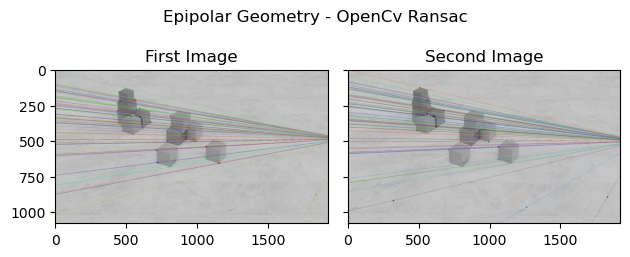

In [79]:
plot_epipolar_lines(im1, im2, pts1=pts1, pts2=pts2, F=F_cv, title= " - OpenCv Ransac")

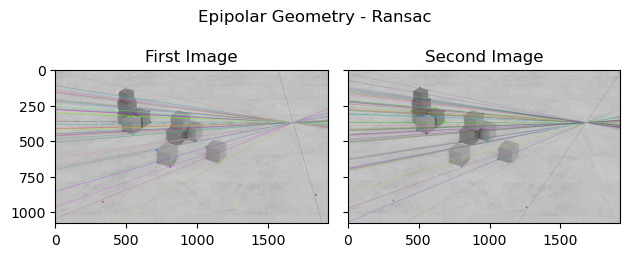

In [77]:
plot_epipolar_lines(im1, im2, pts1=pts1, pts2=pts2, F=F, title= " - Ransac")

## Compute numerical error

In [94]:
def error_in_F(F_ours, F_cv):
    # Normalize then compute error
    F_ours_norm = F_ours/np.linalg.norm(F_ours)
    F_cv_norm = F_cv / np.linalg.norm(F_cv)
    return abs(np.divide(F_ours_norm - F_cv_norm, F_cv))
    #return np.divide(abs(F_ours/np.linalg.norm(F_ours) - F_cv/np.linalg.norm(F_cv)), F_cv/np.linalg.norm(F_cv))

def diff_in_F(F_ours, F_cv):

    return abs(np.divide(F_ours - F_cv, F_cv))
    #return np.divide(abs(F_ours/np.linalg.norm(F_ours) - F_cv/np.linalg.norm(F_cv)), F_cv/np.linalg.norm(F_cv))

In [95]:
def compute_error(pts1, pts2):

    F_ours, _ = EPA.getFundamentalRANSAC(pts1, pts1)

    F_cv, _ = cv2.findFundamentalMat(pts1, pts2, cv2.RANSAC, 1)

    return diff_in_F(F_ours, F_cv)

### Translation

In [96]:
EPA = EightPoint()
# Load data
sequence = Sequence('./Reference_Render_cubes/Reference_Render_Translation')
#sequence = Sequence('./Reference_Render_cubes/Reference_Render_Rotation_and_Translations')
error = []
for i in range(len(sequence.images) -1):
    im1 = sequence.images[i]
    im2 = sequence.images[i+1]
    pts1, pts2 = EPA.getMatchingPointsOpenCV(im1, im2)

    error.append((compute_error(pts1, pts2)))
print(np.array(error).mean(axis=0))

['./Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0001.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0002.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0003.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0004.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0005.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0006.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0007.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0008.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0009.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0010.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation0011.png', './Reference_Render_cubes/Reference_Render_Translation\\cubes_translation00

c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\EightPoint.py:99: RuntimeWarning: divide by zero encountered in divide
  F = F/F[2,2]
c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\EightPoint.py:99: RuntimeWarning: invalid value encountered in divide
  F = F/F[2,2]
c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\EightPoint.py:126: RuntimeWarning: invalid value encountered in matmul
  error = np.abs(np.sum(pts2_hom * (F @ pts1_hom.T).T, axis=1))


NORM nan
NORM 13859737709504.266
NORM 771952770722.9415
Best number of inliers: 255, outliers: 0
NORM 25116932675625.254
NORM 4065449372195.0107
NORM 7410967406297.199
NORM 5154862869780.48
NORM nan
NORM nan
NORM 3333808846581.395
NORM 720170928411.6691
NORM 1780647746387.4338
NORM 720170928411.6691
NORM 7512146154961.511
NORM 9742753499588.89
NORM 5122816937435.693
NORM 2116740794479.9983
NORM 3895342875116.9595
NORM 720170928411.6691
NORM 1972216203771.1758
NORM 720170928411.6691
NORM 3671588613844.161
NORM 1741207948640.0095
NORM 4486041266257.68
NORM 128185980199.18562
NORM 2613591786622.16
NORM 720170928411.6691
NORM 4065492437135.185
NORM 720170928411.6691
NORM 2552533650321.7505
NORM 2358406562104.0537
NORM 432211173393.53595
NORM 720170928411.6691
NORM 4915390173412.443
NORM 720170928411.6691
NORM 10188092650277.955
NORM 2552868456193.8594
NORM 2308617322276.2427
NORM 720170928411.6691
NORM 2503316595199.26
NORM 720170928411.6691
NORM 3779682582703.25
NORM 720170928411.6691
NOR

c:\Users\Home\Documents\GitHub\Comp558Project\8PointAlgorithm\EightPoint.py:132: RuntimeWarning: invalid value encountered in matmul
  error = np.abs(np.sum(pts2_hom * (F @ pts1_hom.T).T, axis=1))


NORM 1832168411187.2568
NORM 915099683976.5726
NORM 49764404666199.82
NORM 2253203069515.986
NORM 720170928411.6691
NORM 748457251342.3547
NORM 720170928411.6691
NORM 6056211483856.198
NORM 5225297282101.484
NORM 2660959640737.8003
NORM 2504137814189.7485
NORM 10900734934849.889
NORM 2036352358946.0723
NORM 3097977882010.9736
NORM 720170928411.6691
NORM nan
NORM 3416295600692.187
NORM 720170928411.6691
NORM 1831403413198.8564
NORM 720170928411.6691
NORM 439925693323.48846
NORM 720170928411.6691
NORM 5309740073295.383
NORM 25639599958502.7
NORM 11390401667758.346
NORM nan
NORM 3777743016230.9375
NORM 21205104735030.098
NORM 2971822571853.615
NORM 720170928411.6691
NORM 562897628649.4535
NORM 720170928411.6691
NORM 3714102067962.5596
NORM 720170928411.6691
NORM 1094297018621.3507
NORM 720170928411.6691
NORM nan
NORM 9532755678484.557
NORM 1202280042410.341
NORM nan
NORM 3197392185895.6323
NORM 720170928411.6691
NORM 3167059840861.3315
NORM 720170928411.6691
NORM 1334510288698.2642
NORM 7

c:\Users\Home\anaconda3\envs\comp558project\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


NORM 6401923621185.233
NORM 1785858609634.3274
NORM 2585560743611.022
NORM 201809541436.07523
NORM 2585560743611.022
NORM 2956592926917.5117
NORM 2585560743611.022
NORM 19179165385749.55
NORM 18954866197524.26
NORM 12744172190672.05
NORM 1131358265041.1746
NORM 199638221373.54578
NORM 2585560743611.022
NORM 1520679113710.4136
NORM 2585560743611.022
NORM 3478917235917.5317
NORM 2585560743611.022
NORM 15632953529862.988
NORM 13083936040313.475
NORM 4095080300999.1567
NORM 2585560743611.022
NORM 1392559043818.7632
NORM 2585560743611.022
NORM 2119871118212.065
NORM 2585560743611.022
NORM 3847551544627.219
NORM 2585560743611.022
NORM 2532364435199.5957
NORM 2585560743611.022
NORM 8625595610537.815
NORM 1594126454523.5613
NORM 4045598693677.291
NORM 1397826023088.3938
NORM 699867275954.1608
NORM 2585560743611.022
NORM 6041174615923.198
NORM 2585560743611.022
NORM 905804826528.5128
NORM 2585560743611.022
NORM 3365585658015.196
NORM 2585560743611.022
NORM 430230712803.9867
NORM 2585560743611.0

C:\Users\Home\AppData\Local\Temp\ipykernel_18068\158114865.py:10: RuntimeWarning: divide by zero encountered in divide
  return abs(np.divide(F_ours - F_cv, F_cv))


NORM 2332969696420.3164
NORM 8445552860831.168
NORM 5761899457296.392
NORM 2376549021855.311
NORM 2332969696420.3164
NORM 1601480629414.6108
NORM 2332969696420.3164
NORM 761412777282.4943
NORM 2332969696420.3164
NORM 2010166347045.522
NORM 2332969696420.3164
NORM 705206887127.0989
NORM 2332969696420.3164
NORM 1617852481282.469
NORM 2332969696420.3164
NORM nan
NORM 4398291142644.571
NORM 2035217781553.404
NORM 6478448002726.569
NORM 1963254519029.32
NORM 3180645981040.306
NORM 2332969696420.3164
NORM 2668097724265.4683
NORM 2332969696420.3164
NORM 6964155613161.505
NORM 1221539288431.158
NORM 11461824844825.096
NORM 3176143448222.1934
NORM 1508293344192.0896
NORM 2332969696420.3164
NORM 3836652053904.2935
NORM 2473034977963.773
NORM 1691003885019.4634
NORM 2332969696420.3164
NORM 2362036881410.506
NORM 2332969696420.3164
NORM 1298715291426.4185
NORM 2332969696420.3164
NORM 5941692652361.531
NORM 22827878212767.836
NORM 16483708506034.637
NORM 65267852144732.96
NORM 2257819976739.6626
NO

### Orbit

In [97]:
EPA = EightPoint()
# Load data
#sequence = Sequence('./Reference_Render_cubes/Reference_Render_Translation')
sequence = Sequence('./Reference_Render_cubes/Reference_Render_Rotation_and_Translations')
error = []
for i in range(len(sequence.images) -1):
    im1 = sequence.images[i]
    im2 = sequence.images[i+1]
    pts1, pts2 = EPA.getMatchingPointsOpenCV(im1, im2)

    error.append((compute_error(pts1, pts2)))
print(np.array(error).mean(axis=0))

['./Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0001.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0002.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0003.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0004.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0005.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0006.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0007.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0008.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0009.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0010.png', './Reference_Render_cubes/Reference_Render_Rotation_and_Translations\\cubes0011.png', './Reference_Render_cubes/Reference_Render_Rotation_a